In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(640, activation='relu'),
    tf.keras.layers.Dense(384, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def lr_schedule(epoch):
    if epoch < 20:
        return 0.001
    else:
        return 0.0001
    
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_data=(test_images, test_labels), callbacks=[lr_scheduler_callback, early_stopping_callback])

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7860 - loss: 0.5966 - val_accuracy: 0.8549 - val_loss: 0.4004 - learning_rate: 0.0010
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8656 - loss: 0.3598 - val_accuracy: 0.8666 - val_loss: 0.3659 - learning_rate: 0.0010
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8833 - loss: 0.3190 - val_accuracy: 0.8733 - val_loss: 0.3479 - learning_rate: 0.0010
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8911 - loss: 0.2952 - val_accuracy: 0.8790 - val_loss: 0.3412 - learning_rate: 0.0010
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9004 - loss: 0.2719 - val_accuracy: 0.8837 - val_loss: 0.3298 - learning_rate: 0.0010
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9019 - loss: 0.2572 - val_accuracy: 0.8751 - val_loss: 0.3529 - learning_rate: 0.0010
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9074 - loss: 0.2471 - 

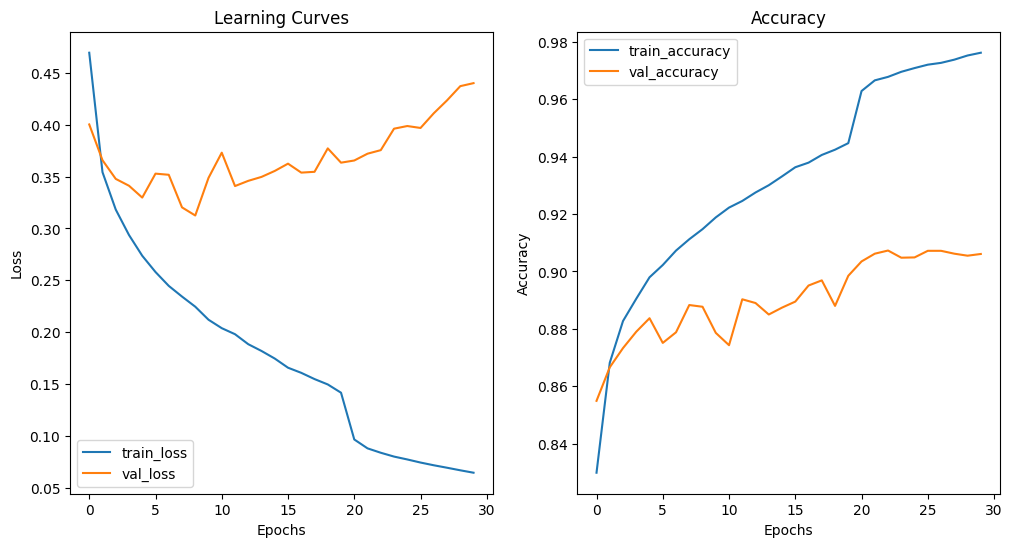

In [4]:
def plot_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(history.history['loss'], label='train_loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Learning Curves')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train_accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()

    plt.show()
    
plot_curves(history)

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9060 - loss: 0.4483
Точність на тестових даних: 0.9060999751091003
